<a href="https://colab.research.google.com/github/DkCodeProjct/AI_Projects..-/blob/main/Ai_Projects_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Andrej Karpathy

##  The spelled-out intro to neural networks and backpropagation: building micrograd

In [ ]:
import matplotlib.pyplot as plt
import math
import numpy as np
%matplotlib inline
import random


In [ ]:
 !pip install micrograd

In [ ]:
def f(x):
    return 3*x**2 - 4*x + 5

f(3.0)

In [ ]:



class Value:
    def __init__(self, data, _childern=(), _op='', label=''):
        self.data = data
        self.grad = 0
        self._backward = lambda: None  # default is a no-op
        self._prev = set(_childern)    # previous nodes in the graph
        self._op = _op                 # operation that produced this node
        self.label = label             # node label for visualization

    def __repr__(self):
        return f'Value(data={self.data}, label={self.label})'

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        output = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1.0 * output.grad
            other.grad += 1.0 * output.grad
        output._backward = _backward
        return output

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        output = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * output.grad
            other.grad += self.data * output.grad
        output._backward = _backward
        return output


    # Power Rule:
    #     d/dx*x**n = n*x**n-1
    def __pow__(self, other):
        assert isinstance(other, (int, float)),  "only suport int/flot for now"
        out = Value(self.data ** other, (self, ), f'**{other}')

        def _backward():
            self.grad = (other * self.data**(other-1)) * out.grad # power rule
        out._backward = _backward
        return out


    def __rmul__(self, other):
        return self * other


    def __truediv__(self, other):
        return self * other**-1


    def __neg__(self):
        return self * -1

    def __sub__(self, other):
        return self + (-other)


    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        output = Value(t, (self,), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * output.grad
        output._backward = _backward
        return output


    def expo(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')
        def _backward():
            self.grad += out.grad * out.data
        out._backward = _backward
        return out

    def backward(self):
        topo = []
        visited = set()

        # Build the topological order
        def buildTopo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    buildTopo(child)
                topo.append(v)

        buildTopo(self)


        self.grad = 1
        for v in reversed(topo):
            v._backward()





In [ ]:

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a+b; e.label='e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')
L = d * f; label='L'
# printing val
#d
#d._prev
#d1 = a.__add__(b).__mul__(c)
#d1
#d._op
L

Value(data=-18.0)

In [ ]:

from graphviz import Digraph


In [ ]:

def trace(rt):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(rt)
    return nodes, edges
def drawDot(rt):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
    nodes, edges = trace(rt)

    for n in nodes:
        vid = str(id(n))
        # Check if the label exists and format it properly
        label_text = f'{n.label} | data {n.data:.4f} | grad {n.grad:.4f}' if n.label else f'data {n.data:.4f} | grad {n.grad:.4f}'

        dot.node(name=vid, label=f'{{{label_text}}}', shape='record')

        if n._op:
            dot.node(name=vid + n._op, label=f'{n._op}')
            dot.edge(vid + n._op, vid)

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot


##Taking Derivatives
###   using The Chain Rule

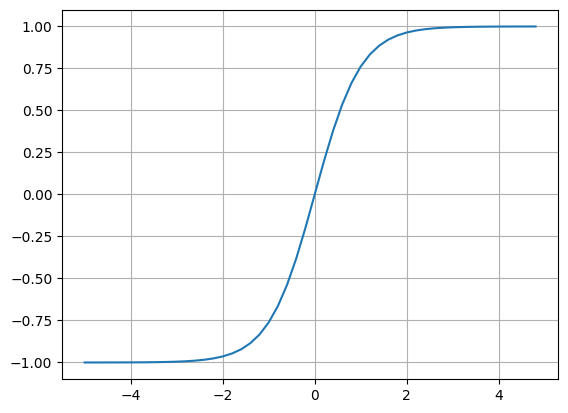

In [ ]:
#Activations And BackProb

# Activation tanh
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2))); plt.grid()

In [ ]:
#Inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3.0,label='w1')
w2 = Value(1.0, label='w2')
b = Value(6.7, label='b')
### // x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label='x1w1'
x2w2 = x2*w2; x2w2.label='x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1+x2w2'
n = x1w1x2w2 + b; n.label='n'
output = n.tanh(); label='o'


#Using _backward ....

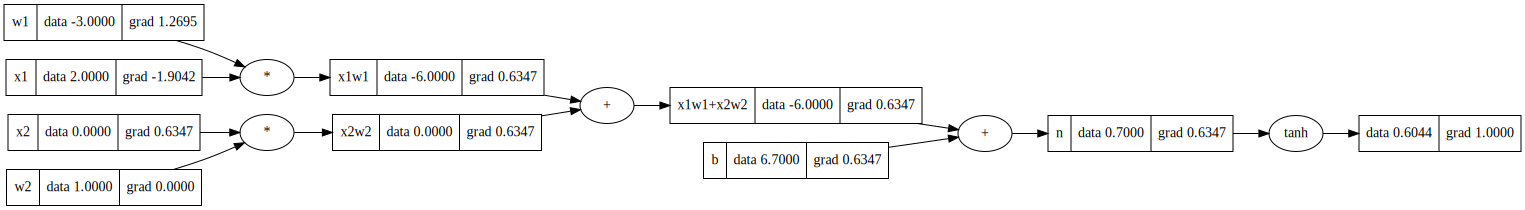

In [ ]:
output.backward()
drawDot(output)

# Apply Backprop Using Topological Sort..


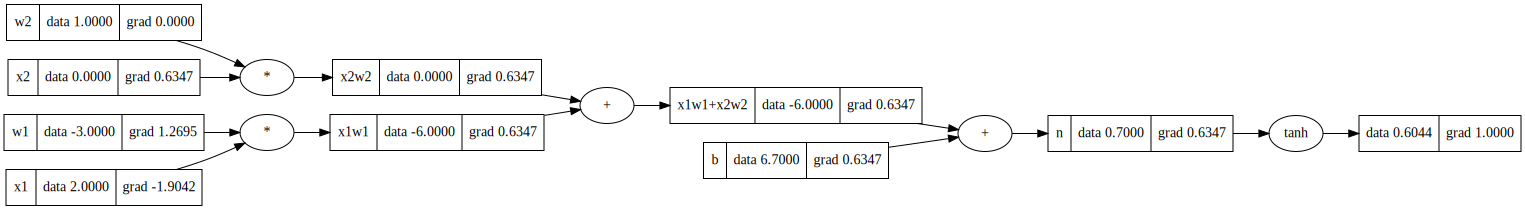

In [ ]:
drawDot(output)

# Topological Sort

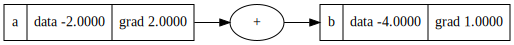

In [ ]:

a = Value(-2.0, label='a')
b = a + a; b.label='b'
b.backward()
drawDot(b)

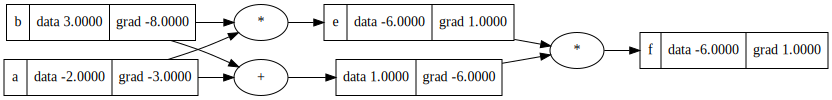

In [ ]:

a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b; d.label='d'
e = a + b; d.label='e'
f = d * e; f.label='f'

f.backward()
drawDot(f)

In [ ]:
a = Value(-3.4)
a.expo()



Value(data=0.03337326996032608)

In [ ]:
a = Value(-3.0)
b = Value( 2.3)

a / b
a - b


Value(data=-5.3)

In [ ]:
#Inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3.0,label='w1')
w2 = Value(1.0, label='w2')
b = Value(6.881375807195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label='x1w1'
x2w2 = x2*w2; x2w2.label='x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1+x2w2'
n = x1w1x2w2 + b; n.label='n'
output = n.tanh(); label='o'
#
e = (2*n).expo()
o = (e - 1) / (e + 1)
#
o.label='o'
o.backward()
drawDot(o)

NameError: name 'Digraph' is not defined

#Pytorch


In [ ]:
import torch




In [ ]:

x1 = torch.tensor([2.0]).double() ; x1.requires_grad=True
x2 = torch.tensor([0.0]).double() ; x2.requires_grad=True
w1 = torch.tensor([-3.0]).double() ; w1.requires_grad=True
w2 = torch.tensor([1.0]).double() ; w2.requires_grad=True
b = torch.tensor([6.8813735878195432]).double() ; b.requires_grad=True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)


print(o.data.item())
o.backward()



print('x2',x2.grad.item())
print('w2',w2.grad.item())
print('x1',x1.grad.item())
print('w1',w1.grad.item())

0.7071066904050358
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [ ]:

torch.Tensor([2.0])

tensor([2.])

In [ ]:
o


tensor([0.7071], dtype=torch.float64, grad_fn=<TanhBackward0>)

In [ ]:



class Neuron:
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))

    def __call__(self, x):
        dot = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
        out = dot.tanh()
        return out


    def parameters(self):
        return self.w + [self.b]


class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        out = [n(x) for n in self.neurons]
        return out[0] if len(out) == 1 else out
    def parameters(self):

        return [p for neurn in self.neurons for p in neurn.parameters()]
        #para = []
        #for nurn in self.neurons:
        #    ps = nurn.parameters()
        #    para.extend(ps)
        #return para

class MLP:
    def __init__(self, nin, nout):
        sz = [nin] + nout
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nout))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    def parameters(self):

        return [p for layr in self.layers for p in layr.parameters()]



In [ ]:

x = [2.0, 3.0, -1.0]
n = MLP(3, [4,4,1])
n(x)

Value(data=-0.2679826348709402, label=)

In [ ]:
n.parameters()

[Value(data=-0.36061548429084156, label=),
 Value(data=0.7571484384730951, label=),
 Value(data=0.7844920798291948, label=),
 Value(data=0.9704486452673031, label=),
 Value(data=0.960613862527917, label=),
 Value(data=0.2910343038724885, label=),
 Value(data=0.5299007944580976, label=),
 Value(data=0.48051711308837075, label=),
 Value(data=-0.47272305690221406, label=),
 Value(data=0.661892042971693, label=),
 Value(data=0.2780476225537851, label=),
 Value(data=0.2124255326068325, label=),
 Value(data=0.080968928727706, label=),
 Value(data=0.7126851045929181, label=),
 Value(data=-0.851642461430645, label=),
 Value(data=-0.21811278577491833, label=),
 Value(data=-0.15169147961152407, label=),
 Value(data=0.20183007276340703, label=),
 Value(data=0.9572182205660678, label=),
 Value(data=0.9390571298627857, label=),
 Value(data=0.448141102343953, label=),
 Value(data=-0.8391755186884471, label=),
 Value(data=0.3339161673455382, label=),
 Value(data=0.6011487514249363, label=),
 Value(da

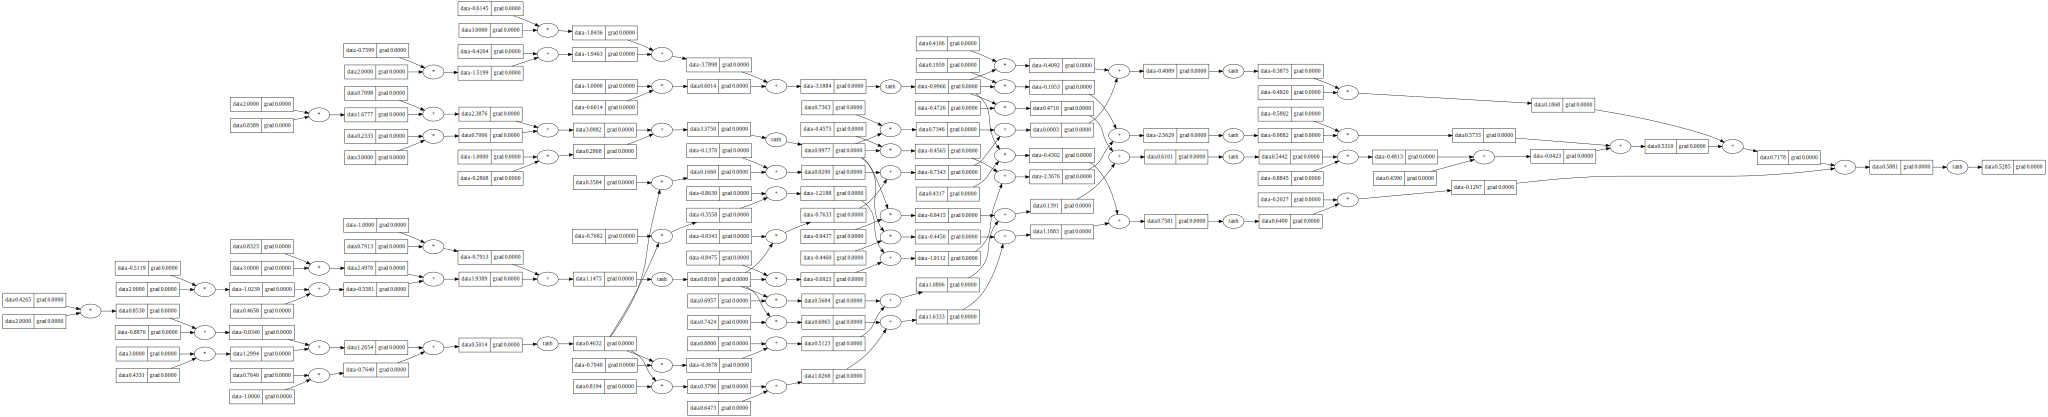

In [ ]:
drawDot(n(x))

#Simple Binary Classify input/output X/Y

In [ ]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

y = [1.0, -1.0, -1.0, 1.0] # Desired output // test data
ypred = [n(x) for x in xs]
ypred

NameError: name 'n' is not defined

#Make Predictions Corect
## Improving Acc
  * Loss Func

In [ ]:
[(youtput - yTrue)**2 for yTrue, youtput in zip(y, ypred)]

[Value(data=0.0088313602659646, label=),
 Value(data=2.2227961800900564, label=),
 Value(data=3.796472406616221, label=),
 Value(data=0.013642873889630007, label=)]

In [ ]:
n.layers[0].neurons[0].w[0].grad


NameError: name 'n' is not defined

In [ ]:
# Assuming y and ypred are lists of Value objects
#loss = sum((youtput - yTrue) ** 2 for yTrue, youtput in zip(y, ypred))
loss = sum((youtput - yTrue).data**2 for yTrue, youtput in zip(y, ypred))

loss


NameError: name 'ypred' is not defined

In [ ]:
loss.backward()

AttributeError: 'float' object has no attribute 'backward'

In [ ]:
drawDot(loss)

AttributeError: 'float' object has no attribute '_prev'

In [ ]:
for p in  n.parameters():
    p.data += -0.01 * p.grad
p

Value(data=-0.2388800547656187, label=)

In [ ]:
n.layers[0].neurons[0].w[0].data
# The Val got decread,, The loss got decreas

0.5791448588216841

In [ ]:
ypred = [n(x) for x in xs]
loss = sum(((yPrd - Value(yTrue))**2 for yTrue, yPrd in zip(ys, ypred)), start=Value(0))


NameError: name 'xs' is not defined

In [ ]:
loss.backward()

AttributeError: 'float' object has no attribute 'backward'

In [ ]:
## So repeatdly applying learning*ypred and aplying  backward
# should get correct predicted val,, but i think i messup somewhere
ypred


[Value(data=-0.2679826348709402, label=),
 Value(data=-0.08478313071456264, label=),
 Value(data=-0.21799320109286546, label=),
 Value(data=-0.7905424285508427, label=)]

In [ ]:
n.parameters()

[Value(data=0.5791448588216841, label=),
 Value(data=0.36179198926099354, label=),
 Value(data=0.9524517882393706, label=),
 Value(data=-0.2741658493636183, label=),
 Value(data=0.25014387589220033, label=),
 Value(data=0.266404136342445, label=),
 Value(data=0.3453639612270347, label=),
 Value(data=0.047632121740672106, label=),
 Value(data=-0.9853529283224245, label=),
 Value(data=-0.14668594100225563, label=),
 Value(data=-0.28845027294446557, label=),
 Value(data=0.33796527690242817, label=),
 Value(data=0.3046729805812076, label=),
 Value(data=0.4353269796000776, label=),
 Value(data=-0.4113499791911599, label=),
 Value(data=0.7483004386654357, label=),
 Value(data=-0.7683733743981245, label=),
 Value(data=0.2913462317238733, label=),
 Value(data=0.41116401019112425, label=),
 Value(data=-0.7243508363602924, label=),
 Value(data=0.577385029451015, label=),
 Value(data=-0.8777716627445409, label=),
 Value(data=0.5206005143979737, label=),
 Value(data=0.07016975711864082, label=),
 

#Forward Pass / BackwardPass / Gradient

In [ ]:

x = [2.0, 3.0, -1.0]
n = MLP(3, [4,4,1])
n(x)

Value(data=-0.3546183907751169, label=)

In [ ]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],

]
ys = [1.0, -1.0, -1.0, 1.0] #expected val



In [ ]:
for k in range(20):
    ypred = [n(x) for x in xs]
    loss = sum((yPrd - yTrue).data**2 for yTrue, yPrd in zip(ys, ypred))

    # set grad to 0 cos it has to reset in evry iteration
    for p in n.parameters():
        p.grad = 0.0

    loss.backward()

    for p in n.parameters():
        p.data += -0.05 * p.grad

    print(k, loss.data)

AttributeError: 'float' object has no attribute 'backward'